# Import Libraries

In [2]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold, cross_val_score,GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

# Set figure size
plt.rcParams['figure.figsize'] = [15, 10]

# Load Dataset

In [3]:
data = pd.read_csv('Data/sonar.all-data.csv', header=None)

# Analyze Data

## Descriptive Statistics

In [4]:
# Shape of the data
print('Data shape :', data.shape, '\n')

Data shape : (208, 61) 



In [5]:
# Data types of attributes in features
print('Data Types :\n ', data.dtypes, '\n')

Data Types :
  0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
       ...   
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object 



In [6]:
# Peak at the data

set_option('display.width', 100)
print(data.head(5))

       0       1       2       3       4       5       6       7       8       9  ...      51  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  0.2111 ...  0.0027   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337  0.2872 ...  0.0084   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598  0.6194 ...  0.0232   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598  0.1264 ...  0.0121   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564  0.4459 ...  0.0031   

       52      53      54      55      56      57      58      59  60  
0  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  0.0090  0.0032   R  
1  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049  0.0052  0.0044   R  
2  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164  0.0095  0.0078   R  
3  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044  0.0040  0.0117   R  
4  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048  0.0107

In [7]:
# Data description

set_option('precision',3)
print('Dataset Description : \n', data.describe())

Dataset Description : 
             0          1        2        3        4        5        6        7        8        9   \
count  208.000  2.080e+02  208.000  208.000  208.000  208.000  208.000  208.000  208.000  208.000   
mean     0.029  3.844e-02    0.044    0.054    0.075    0.105    0.122    0.135    0.178    0.208   
std      0.023  3.296e-02    0.038    0.047    0.056    0.059    0.062    0.085    0.118    0.134   
min      0.002  6.000e-04    0.002    0.006    0.007    0.010    0.003    0.005    0.007    0.011   
25%      0.013  1.645e-02    0.019    0.024    0.038    0.067    0.081    0.080    0.097    0.111   
50%      0.023  3.080e-02    0.034    0.044    0.062    0.092    0.107    0.112    0.152    0.182   
75%      0.036  4.795e-02    0.058    0.065    0.100    0.134    0.154    0.170    0.233    0.269   
max      0.137  2.339e-01    0.306    0.426    0.401    0.382    0.373    0.459    0.683    0.711   

         ...           50         51         52       53         5

In [8]:
# Check class distribution

print('Class Distribution in the dataset : \n' ,data.groupby(60).size())

Class Distribution in the dataset : 
 60
M    111
R     97
dtype: int64


#### <b> Analysis </b>: It is observed that the data set has equal number of classes for rocks (R) and mines (M)

## Data Visualization

### Unimodal Data Visualzation

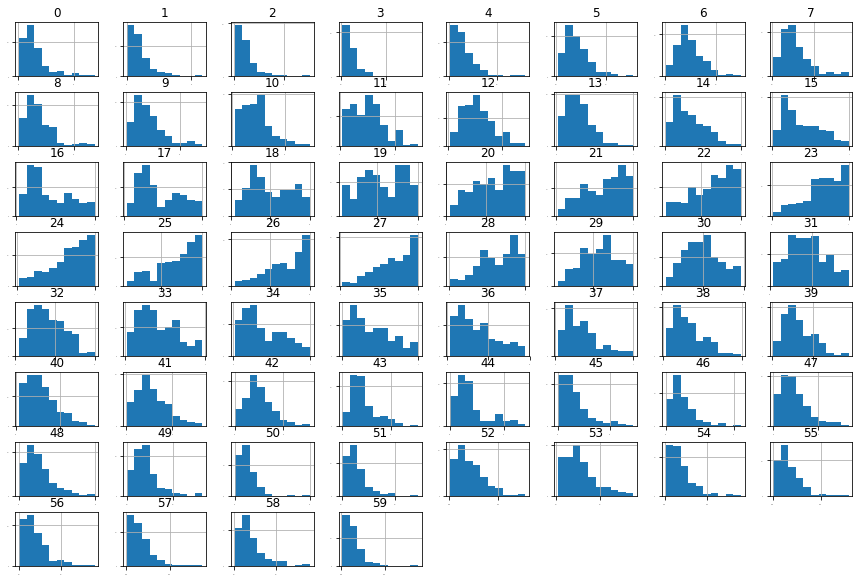

In [9]:
# Unimodal Hist Visualization
data.hist(sharex=False,sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

#### <b> Analysis </b>: It is observed that some features have gaussian distribution and some have exponential distribution.

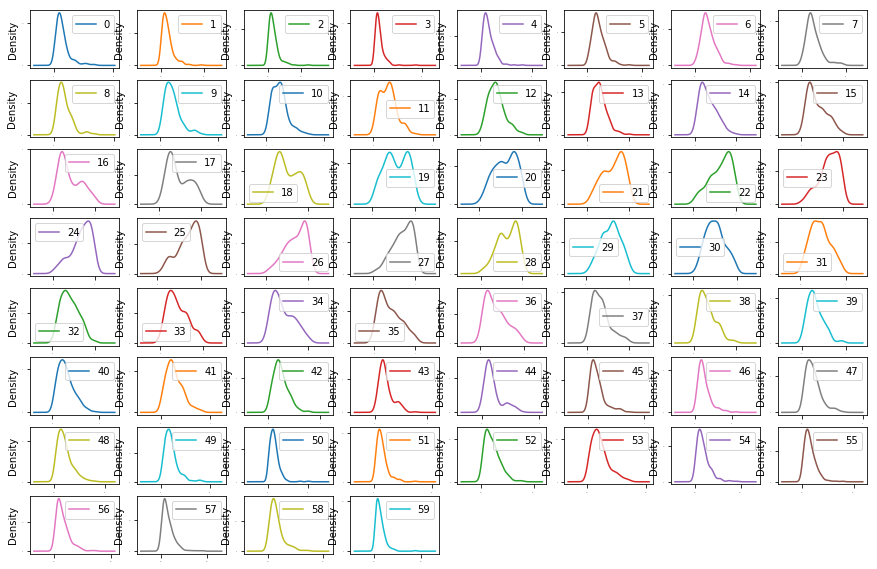

In [10]:
# Unimodal Density Visualization
data.plot(kind='density', subplots=True, sharex=False, sharey=False, layout=(8,8) ,fontsize=1)
plt.show()

#### <b> Analysis </b>: It is observed that many of the features have skewed distribution.

### Multimodal Data Visualzation

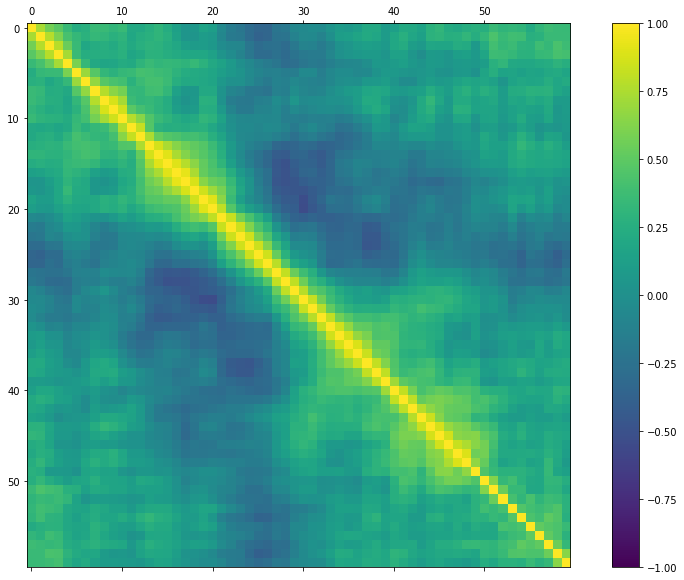

In [11]:
# Plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation=None)
fig.colorbar(cax)
plt.show()

#### <b> Analysis :</b> It looks like there is also some structure in the order of the attributes. The yellow around the diagonal suggests that attributes that are next to each other are generally more correlated with each other. The dark blue patches also suggest some moderate negative correlation the further attributes are away from each other in the ordering. This makes sense if the order of the attributes refers to the angle of sensors for the sonar chirp.

# Data Preparation

In [12]:
# Split the input features and output feature
X = data.iloc[:,0:60].values.astype(float)
Y = data.iloc[:,60]

# Split the input feature for training and testing
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)

# Set Baseline: Using Linear And Non-Linear Machine Learning Models (Unscaled Features)

In [13]:
# Create model test harness

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM', SVC()))

In [14]:
# Evaluate data on test harness
results = []
names = []
num_folds = 10
scoring = 'accuracy' 

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.782721 (0.093796)
LDA: 0.746324 (0.117854)
KNN: 0.808088 (0.067507)
CART: 0.701103 (0.121835)
NB: 0.648897 (0.141868)
SVM: 0.608824 (0.118656)


#### <b> Analysis :</b> The results suggest that both Logistic Regression and k-Nearest Neighbors may be worth further study but are just mean accuracy values. It is always wise to look at the distribution of accuracy values calculated across cross-validation folds.

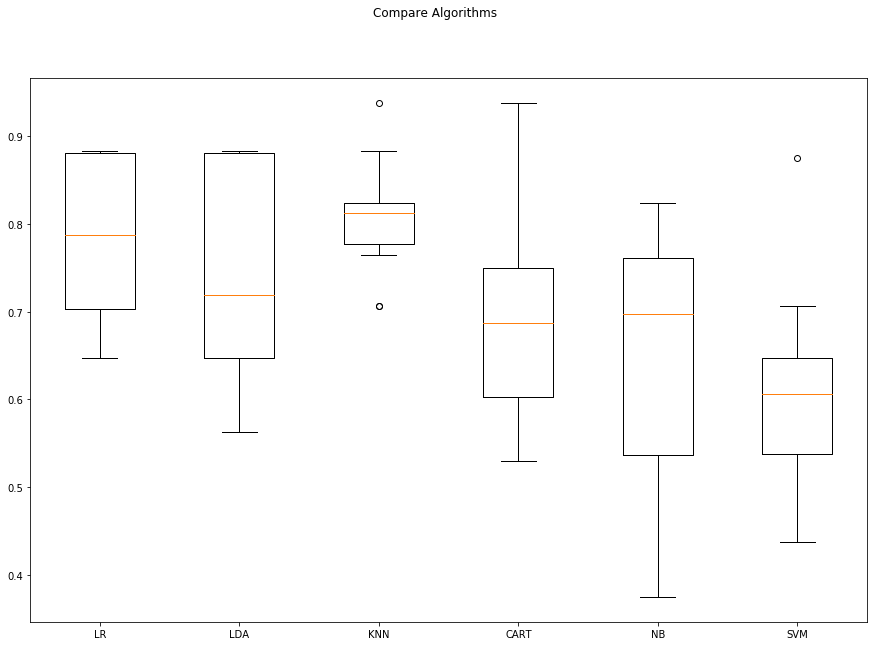

In [15]:
# Compare Algorithms

fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle('Compare Algorithms')
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### <b> Analysis : </b>The results show a tight distribution for KNN which is encouraging with low variance and the poor results for SVM are surprising.

# Using Linear And Non-Linear Machine Learning Models (Scaled Features)

In [16]:
# Pipeline for standardized test harness

pipelines=[]
pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('Scaled-LDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('Scaled-CART', Pipeline([('Scaler', StandardScaler()), ('CART',  DecisionTreeClassifier())])))
pipelines.append(('Scaled-NB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('Scaled-SVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

In [17]:
# Evaluate the test harness (Standardized)

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results  = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

Scaled-LR: 0.734191 (0.095885)
Scaled-LDA: 0.746324 (0.117854)
Scaled-KNN: 0.825735 (0.054511)
Scaled-CART: 0.758824 (0.097440)
Scaled-NB: 0.648897 (0.141868)
Scaled-SVM: 0.836397 (0.088697)


#### <b>Analysis:</b> It is observed that KNN is still doing well, even better than before. It is also observed that the standardization of the data has lifted the skill of SVM to be the most accurate algorithm tested so far.

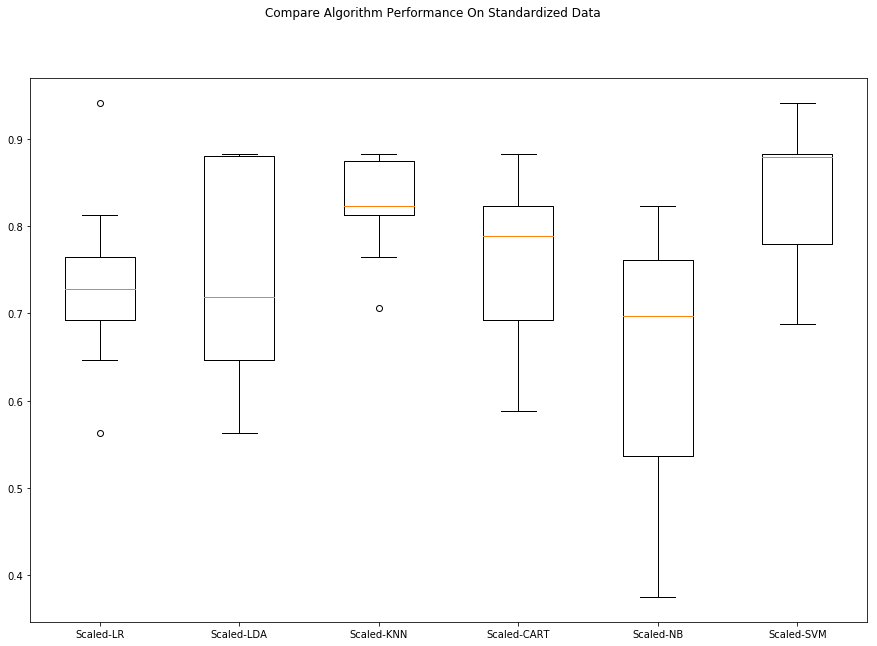

In [18]:
# Compare Scaled Algorithms

fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle('Compare Algorithm Performance On Standardized Data ')
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### <b>Analysis:</b> The results suggest digging deeper into the SVM and KNN algorithms. It is very likely that configuration beyond the default may yield even more accurate models

## Tuning KNN and SVM

### Tuning KNN

In [19]:
# Scale data
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# Define hyperparameters for grid-search
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid  = dict(n_neighbors=neighbors)

# create model
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(model, param_grid=param_grid, scoring=scoring, cv=kfold)

# Fit grid-search
grid_result = grid.fit(rescaledX, y_train)

# Print results of the best score and best parameter
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

# Print the results of grid-search
mean = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['mean_test_score']
params  = grid_result.cv_results_['params']
for mean, stds, params in zip(mean, stds, params):
    print('%f (%f) with: %r' % (mean, stds, params))

Best: 0.849398 using {'n_neighbors': 1}
0.849398 (0.849398) with: {'n_neighbors': 1}
0.837349 (0.837349) with: {'n_neighbors': 3}
0.837349 (0.837349) with: {'n_neighbors': 5}
0.765060 (0.765060) with: {'n_neighbors': 7}
0.753012 (0.753012) with: {'n_neighbors': 9}
0.734940 (0.734940) with: {'n_neighbors': 11}
0.734940 (0.734940) with: {'n_neighbors': 13}
0.728916 (0.728916) with: {'n_neighbors': 15}
0.710843 (0.710843) with: {'n_neighbors': 17}
0.722892 (0.722892) with: {'n_neighbors': 19}
0.710843 (0.710843) with: {'n_neighbors': 21}


#### <b> Analysis </b>: It is observed that the optimal configuration is K=1. This is interesting as the algorithm will make predictions using the most similar instance in the training dataset alone.

### Tuning SVM

In [20]:
# Scale data
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# Define hyperparameters for grid-search
c_values = [0.1,0.3,0.5,0.7,0.9,1.0,1.3,1.5,1.7,2.0]
kernel_values = ['linear', 'poly','rbf','sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

# Fit grid-search
grid_result  = grid.fit(rescaledX, y_train)

# Print results of the best score and best parameter
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

# Print the results of grid-search
mean = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(mean, stds, params):
    print('%f (%f) with: %r' % (mean, std, param))


Best: 0.867470 using {'C': 1.5, 'kernel': 'rbf'}
0.759036 (0.098863) with: {'C': 0.1, 'kernel': 'linear'}
0.530120 (0.118780) with: {'C': 0.1, 'kernel': 'poly'}
0.572289 (0.130339) with: {'C': 0.1, 'kernel': 'rbf'}
0.704819 (0.066360) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.746988 (0.108913) with: {'C': 0.3, 'kernel': 'linear'}
0.644578 (0.132290) with: {'C': 0.3, 'kernel': 'poly'}
0.765060 (0.092312) with: {'C': 0.3, 'kernel': 'rbf'}
0.734940 (0.054631) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.740964 (0.083035) with: {'C': 0.5, 'kernel': 'linear'}
0.680723 (0.098638) with: {'C': 0.5, 'kernel': 'poly'}
0.789157 (0.064316) with: {'C': 0.5, 'kernel': 'rbf'}
0.746988 (0.059265) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.746988 (0.084525) with: {'C': 0.7, 'kernel': 'linear'}
0.740964 (0.127960) with: {'C': 0.7, 'kernel': 'poly'}
0.813253 (0.084886) with: {'C': 0.7, 'kernel': 'rbf'}
0.753012 (0.058513) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.759036 (0.096940) with: {'C': 0.9, 'kernel': 'linear'

#### <b> Analysis:</b> It is observed that the most accurate configuration was SVM with an RBF kernel and a C value of 1.5. The accuracy 86.7470% is seemingly better than what KNN could achieve.

# Model Using Ensemble Algorithms

In [21]:
# ensemble scaled algorithms

ensemble = []
ensemble.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostClassifier())])))
ensemble.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingClassifier())])))
ensemble.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier())])))
ensemble.append(('ScaledET', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesClassifier())])))

results = []
names = []
for name, model in ensemble:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)'  % (name, cv_results.mean(), cv_results.std()))

ScaledAB: 0.813971 (0.066017)
ScaledGBM: 0.835662 (0.096783)
ScaledRF: 0.783088 (0.092615)
ScaledET: 0.820221 (0.111324)


#### <b> Analysis: </b> It is observed that both boosting techniques provide strong accuracy scores in the low 80s (%) with default configurations. We can plot the distribution of accuracy scores across the cross-validation folds.

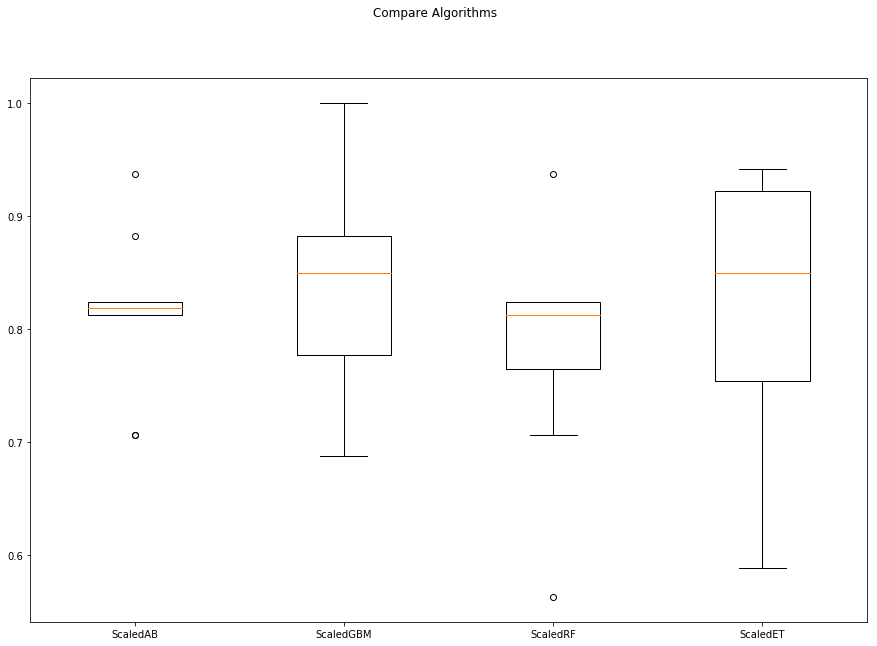

In [22]:
# Compare algorithhms 
fig  = plt.figure()
fig.suptitle('Compare Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### <b>Analysis:</b> The results suggest GBM may be worthy of further study, with a strong mean and a spread that skews up towards high 90s (%) in accuracy.

# Make Classification Using Final model (SVC) 
The SVM showed the most promise as a low complexity and stable model for this problem. In
this section we will finalize the model by training it on the entire training dataset and make
predictions for the hold-out validation dataset to confirm our findings. A part of the findings was
that SVM performs better when the dataset is standardized so that all attributes have a mean
value of zero and a standard deviation of one.

In [23]:
# SVC model for classification

scaler  = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5, kernel='rbf')
model.fit(rescaledX, y_train)

SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
# test the algorithm on validation dataset
rescaled_vali_X = scaler.transform(X_test)
preditions = model.predict(rescaled_vali_X)
print('Accuracy: ', accuracy_score(y_test, preditions) * 100, '\n')
print('Confusion Matrix : \n',confusion_matrix(y_test, preditions), '\n')
print('Classification Report : \n ',classification_report(y_test, preditions))

Accuracy:  85.71428571428571 

Confusion Matrix : 
 [[23  4]
 [ 2 13]] 

Classification Report : 
               precision    recall  f1-score   support

          M       0.92      0.85      0.88        27
          R       0.76      0.87      0.81        15

avg / total       0.86      0.86      0.86        42



#### <b>Analysis:</b> It is observed that we achieve an accuracy of nearly 85% on the held-out validation dataset. A score that matches closely to our expectations estimated above during the tuning of SVM.